In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

In [2]:
path = Path.home() / 'PycharmProjects/data_toolkit/stats/data'
file = path / 'marketing_campaign.csv'
df = pd.read_csv(file, delimiter='\t')
sampled_df = df.sample(n=100, random_state=100)
sampled_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1514,3865,1977,2n Cycle,Together,20981.0,0,0,30-04-2013,14,2,...,8,0,0,0,0,0,0,3,11,1
864,4120,1975,2n Cycle,Single,49514.0,1,0,17-12-2013,61,88,...,7,0,0,0,0,0,0,3,11,0
1085,6295,1977,Graduation,Married,54233.0,0,1,04-02-2013,46,652,...,8,0,0,0,0,0,0,3,11,0
1575,4967,1960,PhD,Together,38201.0,0,1,29-03-2013,19,233,...,8,0,0,0,0,0,0,3,11,0
1254,5011,1963,Graduation,Divorced,68118.0,0,1,18-10-2013,51,595,...,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,7930,1969,Master,Single,26877.0,0,0,19-08-2013,74,101,...,6,0,0,0,0,0,0,3,11,0
2042,8416,1981,Graduation,Married,29009.0,1,0,29-11-2013,19,6,...,6,0,0,0,0,0,0,3,11,0
843,11121,1981,Graduation,Married,19419.0,1,0,10-11-2012,76,2,...,9,0,0,0,0,0,0,3,11,0
1072,3807,1955,Graduation,Together,59925.0,0,1,30-11-2012,83,473,...,6,0,0,0,0,0,0,3,11,0


# T-Test
`T-test` is used when we want to test the relationship between a numeric variable and a categorical variable.

if I would like to test whether “Recency” (the number of days since customer’s last purchase ) contributes to the prediction of “Response” (whether the customer accepted the offer in the last campaign ), I can use a two sample t-test.

In [3]:
recency_P = sampled_df[sampled_df['Response'] == 1]['Recency']
recency_N = sampled_df[sampled_df['Response'] == 0]['Recency']

<AxesSubplot:xlabel='Recency', ylabel='Density'>

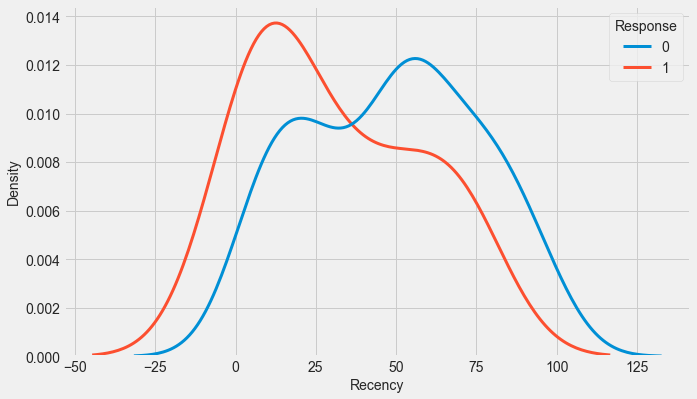

In [4]:
sns.kdeplot(data=sampled_df, x='Recency', hue='Response', common_norm=False)

- null: there is no difference in `Recency` between the customers who accept the offer in the last campaign and who don’t accept the offer
- alternative: customers who accept the offer has lower `Recency` compared to customers who don’t accept the offer

In [5]:
t_stat, pvalue = ttest_ind(recency_P, recency_N, alternative='less')
print(t_stat, pvalue)
if pvalue < .05:
    print('reject H0')

-2.2792332995612146 0.012411104322490327
reject H0


# ANOVA Test
`ANOVA` examines the difference among groups by calculating the ratio of variance across groups vs variance within a group. Larger ratio indicates that the difference across groups is a result of the group difference rather than just random chance.

In [6]:
kidhome_0 = sampled_df[sampled_df['Kidhome'] == 0]['NumWebPurchases']
kidhome_1 = sampled_df[sampled_df['Kidhome'] == 1]['NumWebPurchases']
kidhome_2 = sampled_df[sampled_df['Kidhome'] == 2]['NumWebPurchases']

<AxesSubplot:xlabel='NumWebPurchases', ylabel='Density'>

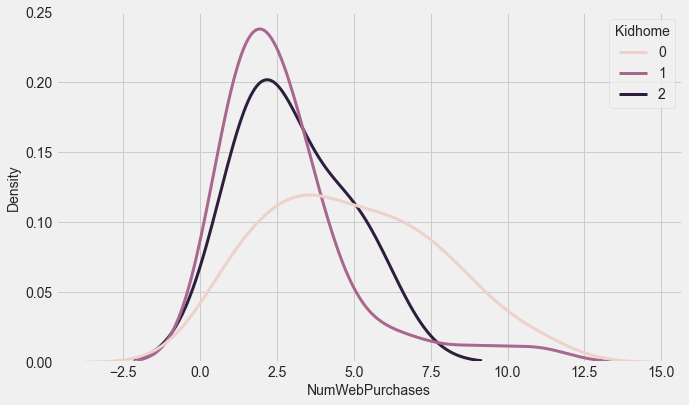

In [7]:
sns.kdeplot(data=sampled_df, x='NumWebPurchases', hue='Kidhome', common_norm=False)

In [8]:
f_stat, pvalue = f_oneway(kidhome_0, kidhome_1, kidhome_2)
print(t_stat, pvalue)
if pvalue < .05:
    print('reject H0')

-2.2792332995612146 0.00039808004666969554
reject H0


# Chi-Squared
`Chi-Squared` test is for testing the relationship between two categorical variables.

- null: “Education” and “Response” are independent to each other.
- alternative: “Education” and “Response” are dependent to each other.

In [9]:
ed_contingency = pd.crosstab(sampled_df['Education'], sampled_df['Response'])
ed_contingency

Response,0,1
Education,,
2n Cycle,13,3
Basic,2,0
Graduation,44,5
Master,9,4
PhD,17,3


<AxesSubplot:xlabel='Education'>

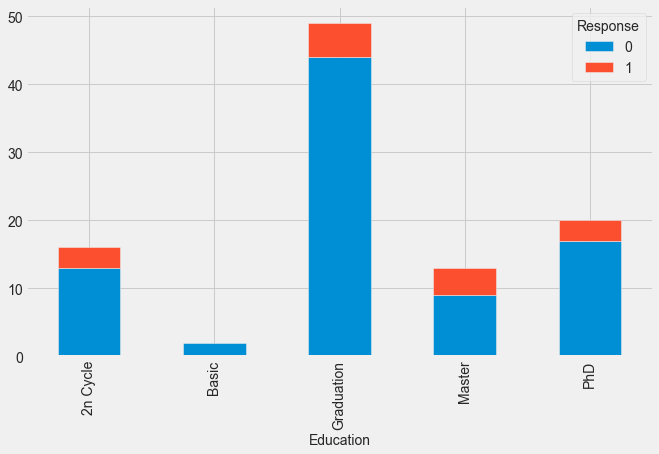

In [10]:
ed_contingency.plot(kind='bar', stacked=True)

In [11]:
chi2_stat, pvalue, dof, exp = chi2_contingency(ed_contingency)
print(chi2_stat, pvalue)
if pvalue < .05:
    print('reject H0')

3.9488102933481084 0.4129779495497867
